In [3]:
# data comes from ECDC: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# alternative source for italy-only data would be this one: https://github.com/pcm-dpc/COVID-19

import pandas as pd
import datetime as dt

try: 
    # see if today's data is available:
    today = dt.datetime.today().strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+today+'.xlsx')
except:
    # otherwise get yesterday's data:
    yesterday = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+yesterday+'.xlsx')

df0.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-18,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-17,17,4,2020,10,4,Afghanistan,AF,AFG,37172386.0
2,2020-04-16,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0
3,2020-04-15,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
4,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0


In [4]:
# remove duplicated values 
df0 = df0[~df0[['dateRep','countriesAndTerritories']].duplicated()]
# pivot
df = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='cases')
df.fillna(0,inplace=True)
df.tail(5)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-14,58.0,21.0,69.0,8.0,0.0,0.0,2.0,69.0,26.0,0.0,...,14.0,0.0,25023.0,9.0,133.0,8.0,3.0,0.0,2.0,3.0
2020-04-15,49.0,8.0,87.0,13.0,0.0,0.0,0.0,160.0,72.0,0.0,...,7.0,0.0,26922.0,12.0,167.0,4.0,9.0,0.0,0.0,0.0
2020-04-16,70.0,19.0,90.0,14.0,0.0,0.0,0.0,0.0,48.0,1.0,...,35.0,0.0,30148.0,6.0,137.0,4.0,1.0,0.0,3.0,6.0
2020-04-17,10.0,24.0,108.0,9.0,0.0,0.0,0.0,128.0,42.0,2.0,...,6.0,0.0,31667.0,13.0,78.0,7.0,0.0,0.0,0.0,1.0
2020-04-18,51.0,21.0,150.0,14.0,0.0,0.0,0.0,98.0,47.0,1.0,...,53.0,0.0,30833.0,18.0,70.0,23.0,1.0,0.0,4.0,0.0


In [5]:
# select only columns with totals greater than 1000
df2 = df[df.columns[df.sum()>20000]]
df2.sum().sort_values(ascending=False)

countriesAndTerritories
United_States_of_America    702164.0
Spain                       188068.0
Italy                       172434.0
Germany                     137439.0
France                      109252.0
United_Kingdom              108692.0
China                        83785.0
Iran                         79494.0
Turkey                       78546.0
Belgium                      36138.0
Brazil                       33682.0
Russia                       32008.0
Canada                       31872.0
Netherlands                  30449.0
Switzerland                  26997.0
dtype: float64

In [6]:
# reorder the columns
df2 = df2[df2.sum().sort_values(ascending=False).index]
df2.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,France,United_Kingdom,China,Iran,Turkey,Belgium,Brazil,Russia,Canada,Netherlands,Switzerland
dateRep,,,,,,,,,,,,,,,
2020-04-14,25023.0,3477.0,3153.0,2082.0,2673.0,4342.0,94.0,1617.0,4093.0,942.0,1261.0,2558.0,1298.0,964.0,279.0
2020-04-15,26922.0,3045.0,2972.0,2486.0,5497.0,5252.0,49.0,1574.0,4062.0,530.0,1832.0,2774.0,1383.0,868.0,254.0
2020-04-16,30148.0,5092.0,2667.0,2866.0,2633.0,4603.0,50.0,1512.0,4281.0,2454.0,3058.0,3388.0,1318.0,734.0,583.0
2020-04-17,31667.0,5183.0,3786.0,3380.0,2641.0,4617.0,352.0,1606.0,4801.0,1236.0,2105.0,3448.0,1717.0,1061.0,315.0
2020-04-18,30833.0,5252.0,3493.0,3609.0,405.0,5599.0,31.0,1499.0,4353.0,1329.0,3257.0,4070.0,1791.0,1235.0,346.0


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# calculate first and last date to show on plot:
first_date = df2.index.min() + dt.timedelta(days=14)
last_date  = df2.index.max() + dt.timedelta(days=18)
date_range = [first_date,last_date]

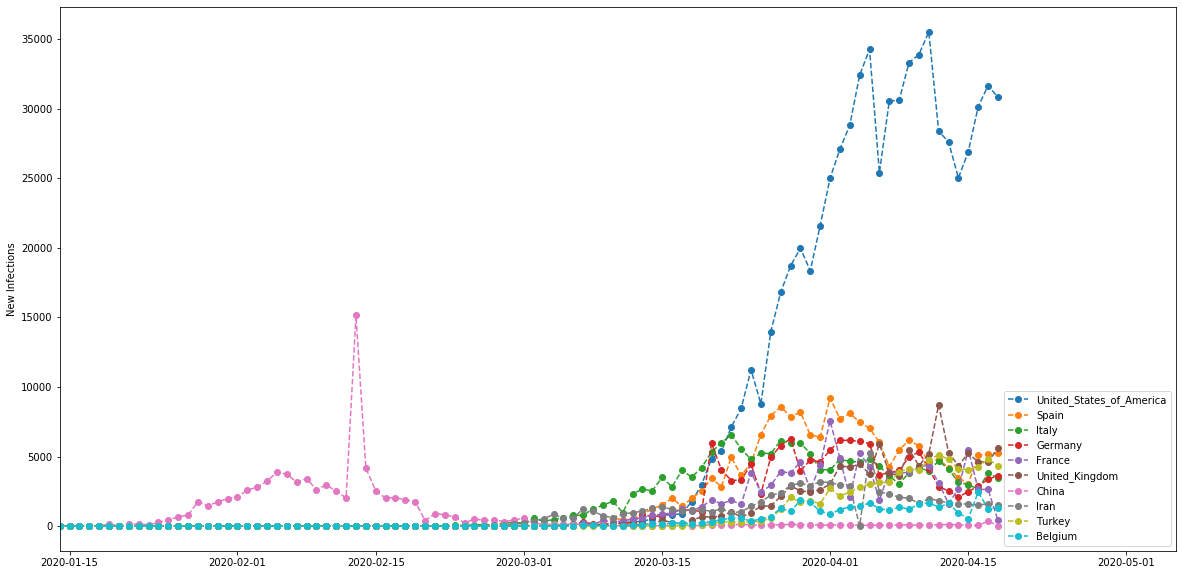

In [8]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10],'o--')
plt.ylabel("New Infections")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

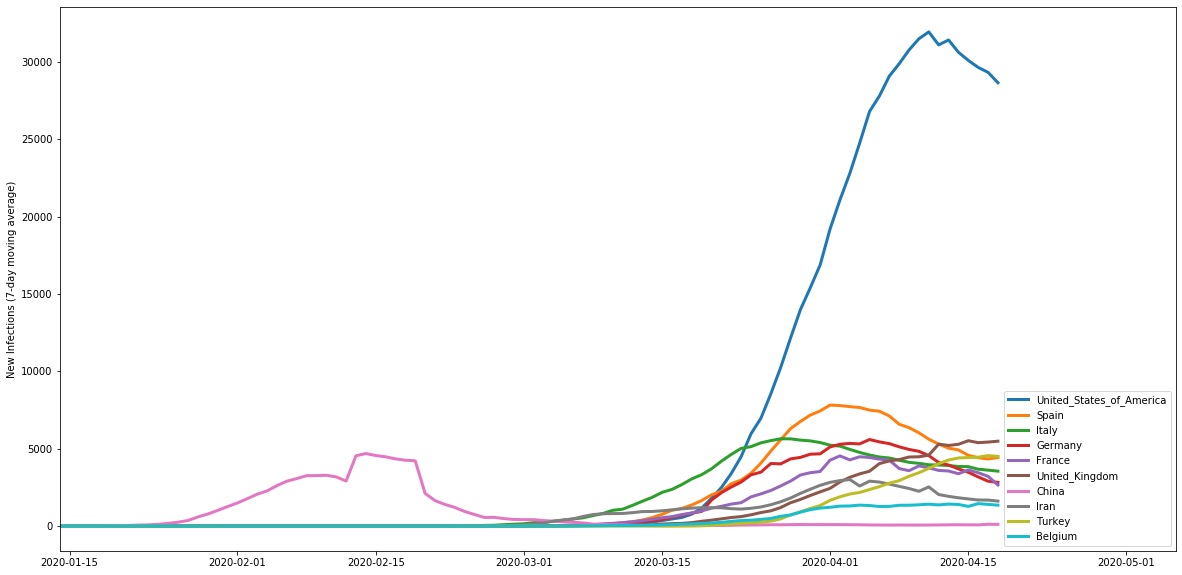

In [9]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Infections (7-day moving average)")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

In [10]:
df2cum = df2.cumsum()
df2cum.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,France,United_Kingdom,China,Iran,Turkey,Belgium,Brazil,Russia,Canada,Netherlands,Switzerland
dateRep,,,,,,,,,,,,,,,
2020-04-14,582594.0,169496.0,159516.0,125098.0,98076.0,88621.0,83303.0,73303.0,61049.0,30589.0,23430.0,18328.0,25663.0,26551.0,25499.0
2020-04-15,609516.0,172541.0,162488.0,127584.0,103573.0,93873.0,83352.0,74877.0,65111.0,31119.0,25262.0,21102.0,27046.0,27419.0,25753.0
2020-04-16,639664.0,177633.0,165155.0,130450.0,106206.0,98476.0,83402.0,76389.0,69392.0,33573.0,28320.0,24490.0,28364.0,28153.0,26336.0
2020-04-17,671331.0,182816.0,168941.0,133830.0,108847.0,103093.0,83754.0,77995.0,74193.0,34809.0,30425.0,27938.0,30081.0,29214.0,26651.0
2020-04-18,702164.0,188068.0,172434.0,137439.0,109252.0,108692.0,83785.0,79494.0,78546.0,36138.0,33682.0,32008.0,31872.0,30449.0,26997.0


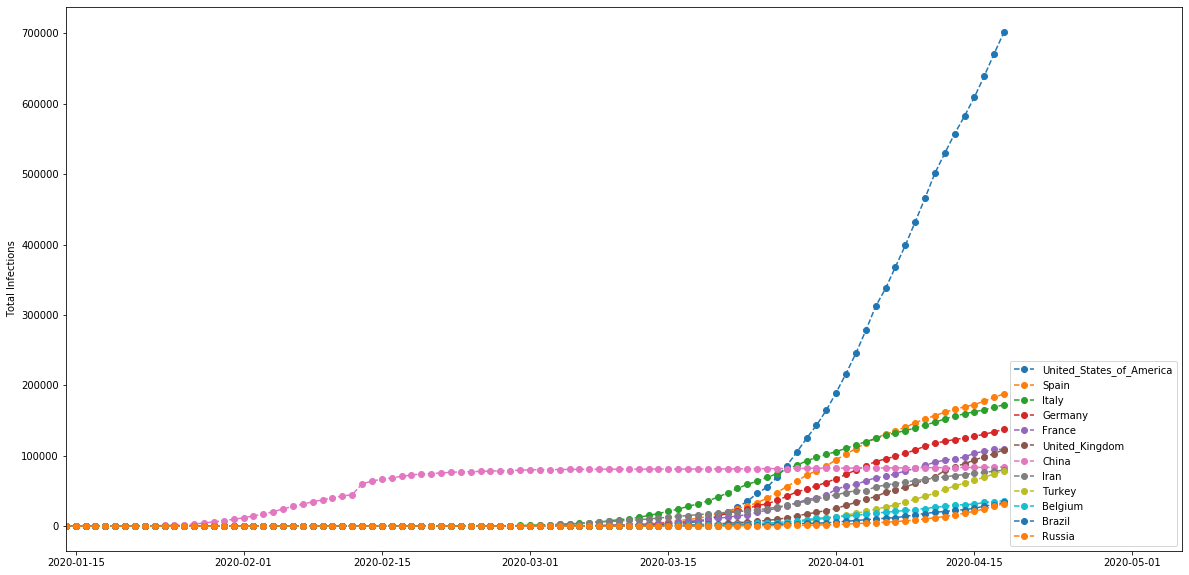

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4);

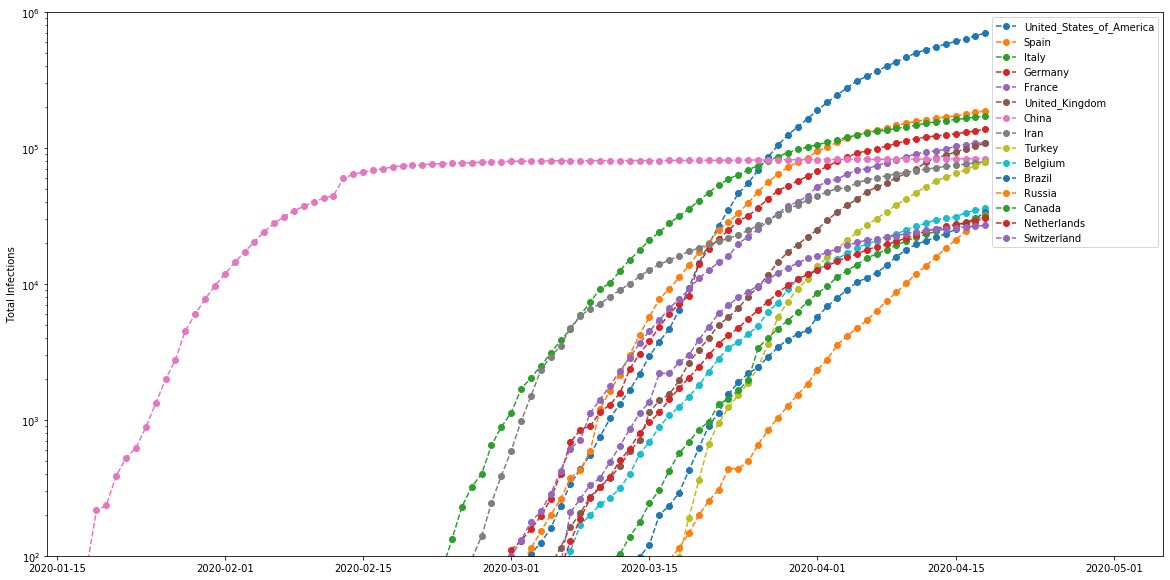

In [12]:
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.ylim([100,1000000])
plt.ylabel("Total Infections")
plt.plot(df2cum.iloc[:,:32],'o--')
plt.xlim(date_range)
plt.legend(df2cum.columns.values);

In [13]:
# now look at the mortality data
df_deaths = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='deaths')
df_deaths.fillna(0,inplace=True)
df_deaths = df_deaths[df_deaths.columns[df_deaths.sum()>100]]
df_deaths = df_deaths[df_deaths.sum().sort_values(ascending=False).index]
df_deaths.tail(7)

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Israel,Pakistan,Norway,Morocco,Ukraine,Argentina,Panama,Chile,Serbia,Greece
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-12,1831.0,619.0,510.0,635.0,917.0,327.0,125.0,0.0,129.0,132.0,...,6.0,15.0,6.0,4.0,4.0,7.0,5.0,8.0,3.0,3.0
2020-04-13,1500.0,431.0,619.0,561.0,737.0,254.0,117.0,2.0,126.0,94.0,...,2.0,7.0,5.0,7.0,10.0,6.0,8.0,7.0,6.0,5.0
2020-04-14,1541.0,564.0,517.0,574.0,717.0,303.0,111.0,0.0,170.0,86.0,...,13.0,3.0,11.0,8.0,10.0,3.0,7.0,2.0,0.0,1.0
2020-04-15,2408.0,604.0,567.0,762.0,778.0,254.0,98.0,1.0,285.0,122.0,...,7.0,11.0,13.0,0.0,5.0,7.0,1.0,10.0,4.0,2.0
2020-04-16,4928.0,578.0,523.0,1438.0,761.0,283.0,94.0,0.0,315.0,189.0,...,7.0,17.0,3.0,1.0,18.0,4.0,8.0,2.0,15.0,1.0
2020-04-17,2299.0,525.0,551.0,753.0,861.0,417.0,92.0,1290.0,299.0,181.0,...,12.0,11.0,6.0,3.0,9.0,6.0,6.0,11.0,4.0,3.0
2020-04-18,3770.0,575.0,348.0,761.0,847.0,306.0,89.0,0.0,242.0,144.0,...,9.0,8.0,0.0,5.0,8.0,7.0,7.0,11.0,7.0,0.0


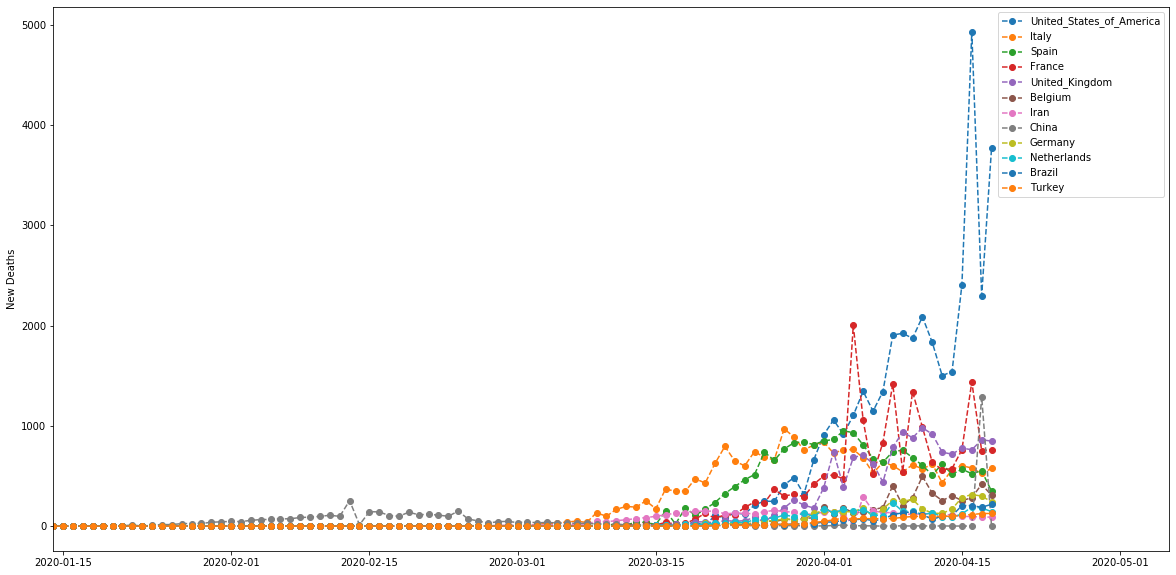

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12],'o--')
plt.ylabel("New Deaths")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

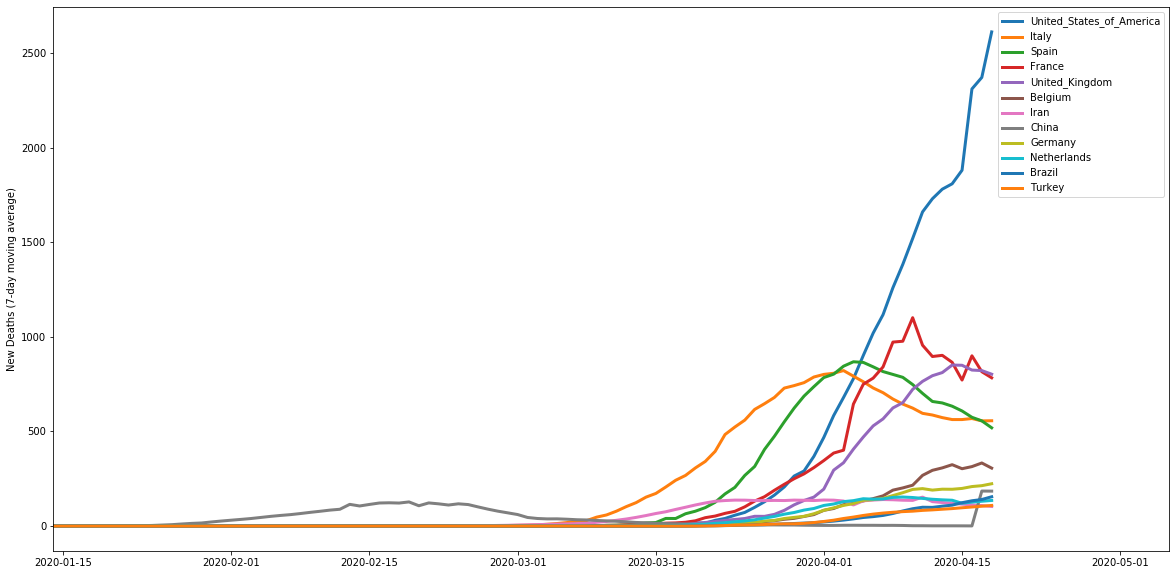

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Deaths (7-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

In [16]:
df_deaths_cum = df_deaths.cumsum()
df_deaths_cum.tail()

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Israel,Pakistan,Norway,Morocco,Ukraine,Argentina,Panama,Chile,Serbia,Greece
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-14,23649.0,20465.0,17489.0,14967.0,11329.0,3903.0,4585.0,3345.0,2969.0,2823.0,...,116.0,96.0,114.0,126.0,93.0,98.0,94.0,82.0,80.0,99.0
2020-04-15,26057.0,21069.0,18056.0,15729.0,12107.0,4157.0,4683.0,3346.0,3254.0,2945.0,...,123.0,107.0,127.0,126.0,98.0,105.0,95.0,92.0,84.0,101.0
2020-04-16,30985.0,21647.0,18579.0,17167.0,12868.0,4440.0,4777.0,3346.0,3569.0,3134.0,...,130.0,124.0,130.0,127.0,116.0,109.0,103.0,94.0,99.0,102.0
2020-04-17,33284.0,22172.0,19130.0,17920.0,13729.0,4857.0,4869.0,4636.0,3868.0,3315.0,...,142.0,135.0,136.0,130.0,125.0,115.0,109.0,105.0,103.0,105.0
2020-04-18,37054.0,22747.0,19478.0,18681.0,14576.0,5163.0,4958.0,4636.0,4110.0,3459.0,...,151.0,143.0,136.0,135.0,133.0,122.0,116.0,116.0,110.0,105.0


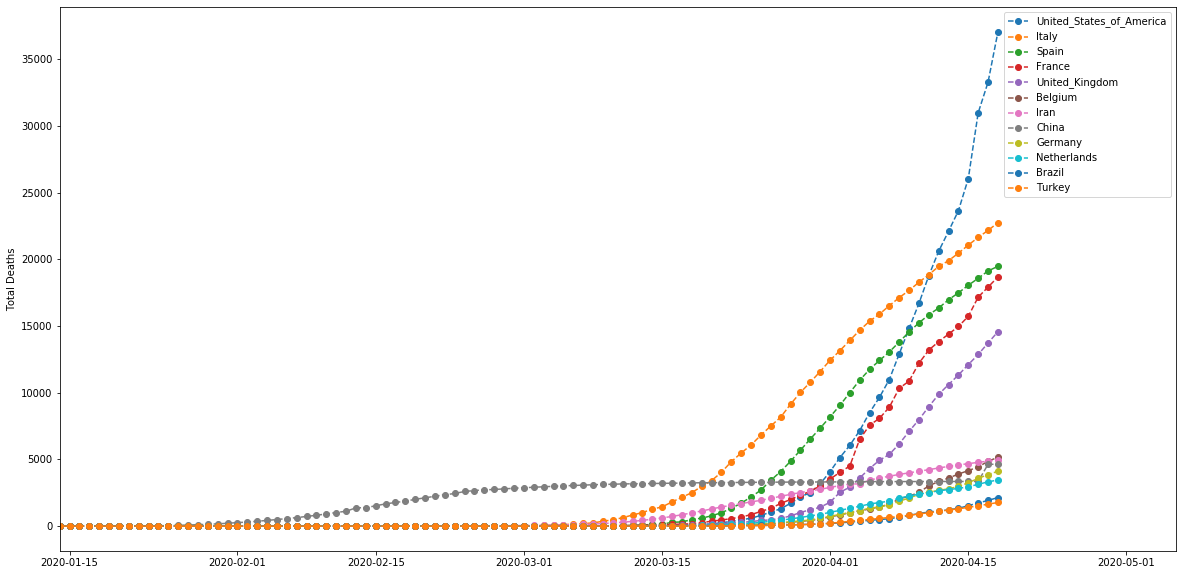

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:12],'o--')
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values,loc=1);

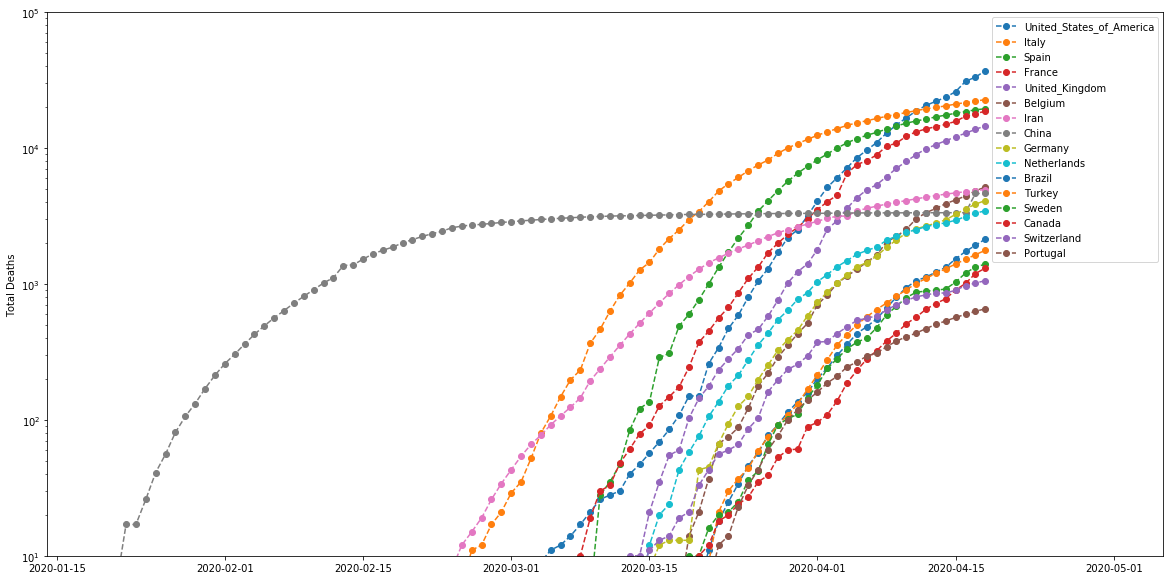

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:16],'o--')
plt.yscale('log')
plt.ylim([10,100000])
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values, loc=1);

In [19]:
# calculate delay after China to reach 20 deaths: 
china_date = df_deaths_cum['China'].gt(19).idxmax()
df_delay = (df_deaths_cum.gt(19).idxmax() - china_date)
df_delay.sort_values(ascending=True).head()

countriesAndTerritories
China                       0 days
Iran                       35 days
Italy                      36 days
South_Korea                38 days
United_States_of_America   45 days
dtype: timedelta64[ns]

In [20]:
# shift all of the countries to the same start date: 
df_deaths_cum_shifted = df_deaths_cum.copy()
for col in list(df_deaths_cum_shifted):
    df_deaths_cum_shifted[col] = df_deaths_cum_shifted[col].shift(-df_delay[col].days)

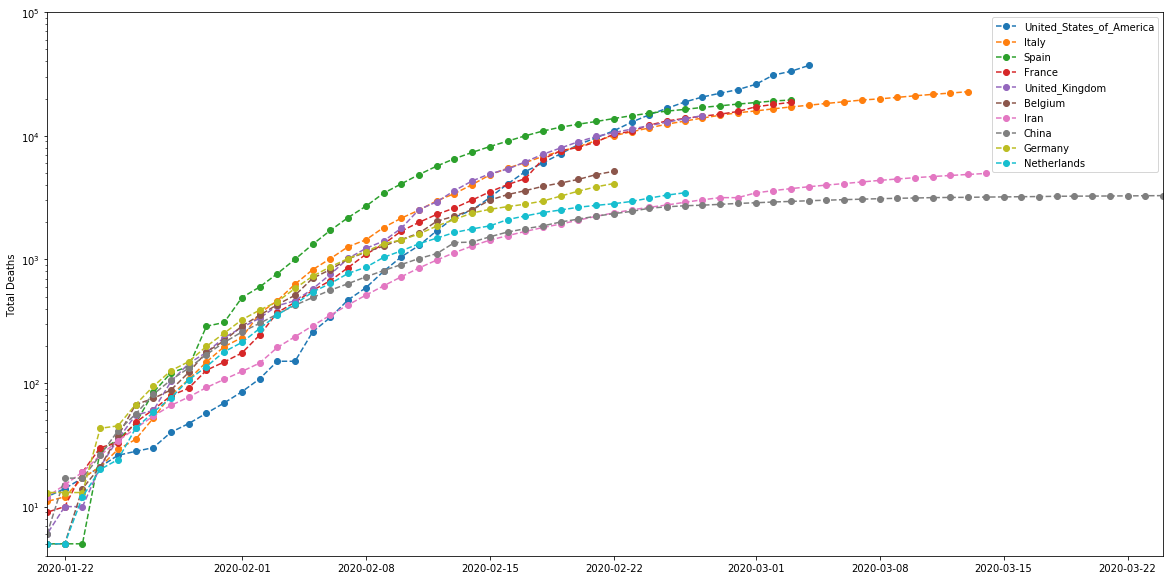

In [21]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum_shifted.iloc[:,:10],'o--')
plt.yscale('log')
plt.ylim([4,100000])
plt.ylabel("Total Deaths")
plt.xlim([china_date - dt.timedelta(days=3), china_date + dt.timedelta(days=60)])
plt.legend(df_deaths_cum.columns.values, loc=0);

In [22]:
import numpy as np
italy = df_deaths_cum['Italy']
italy = italy[italy > 20]
xdata = np.array(range(len(italy)))
ydata = italy

In [23]:
#see https://en.wikipedia.org/wiki/Generalised_logistic_function
def generalised_logistic(x, a, b, c, d, e):
     y = a / np.power(np.abs(1 + b*np.exp(-c*(x+d))),1/e)
     return y

In [24]:
from scipy.optimize import curve_fit
#popt, pcov = curve_fit(generalised_logistic, xdata, ydata)
#popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=1/(1+xdata))
popt, pcov = curve_fit(generalised_logistic, xdata, ydata, p0=[10000,10,.1,0,1], maxfev=10000)
popt

array([2.80495952e+04, 1.33491244e+00, 7.73021095e-02, 1.57449779e+01,
       3.94734592e-02])

Text(0, 0.5, 'Total Deaths')

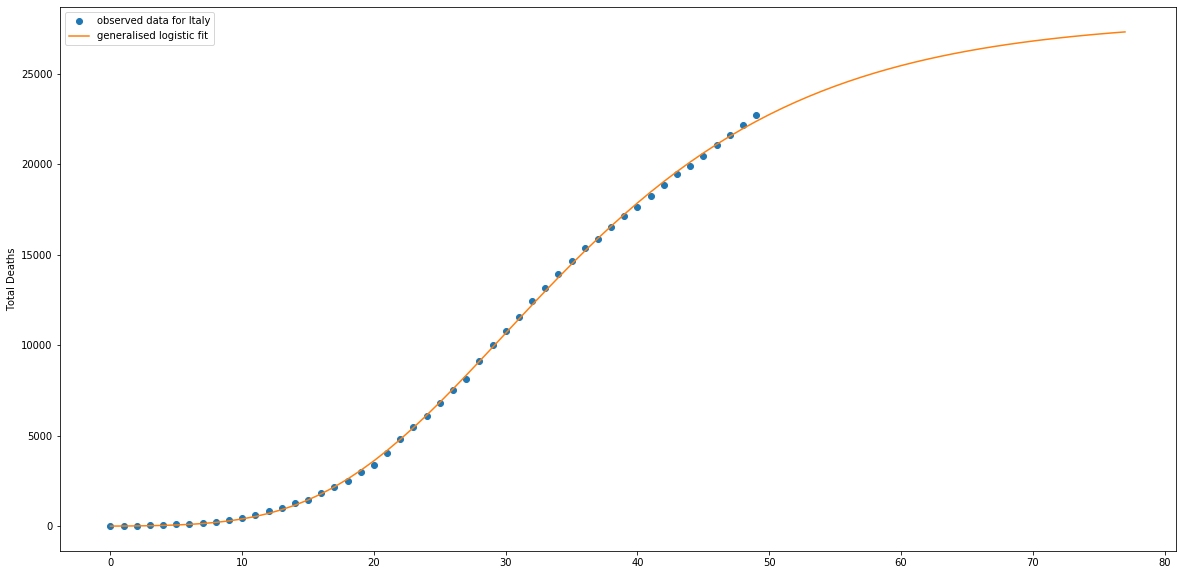

In [25]:
plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
xpred = range(len(ydata)+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.legend(loc='best')
plt.ylabel("Total Deaths")

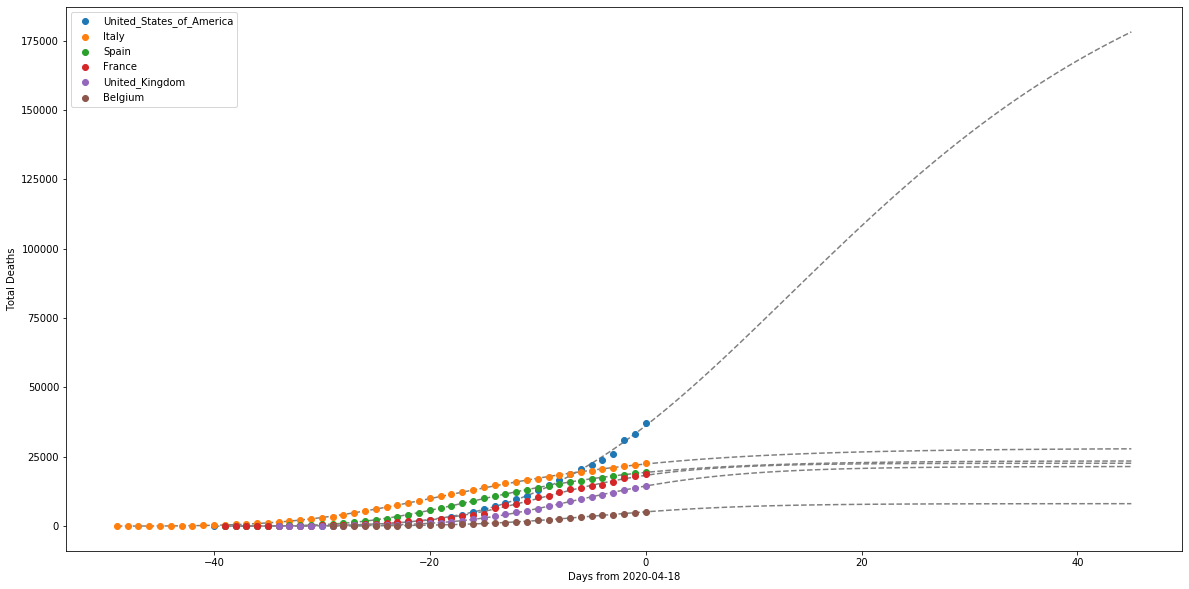

In [45]:
plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:6]:
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, p0=[10000,10,.1,0,1], maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0)

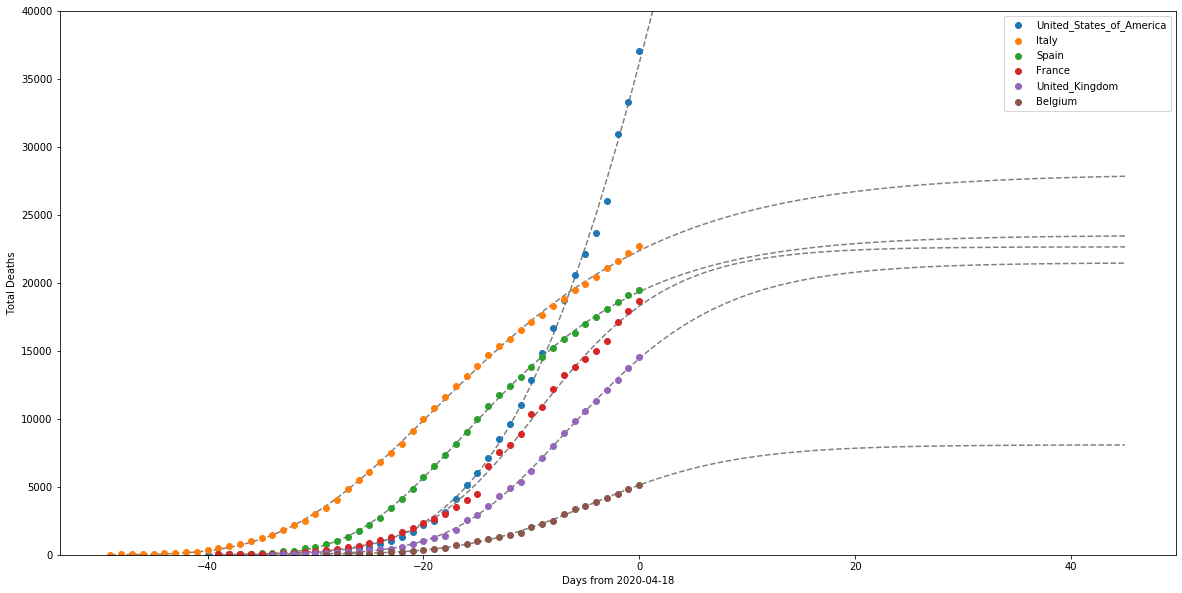

In [44]:
# zoom in the y-axis on the previous plot

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:6]:
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, p0=[10000,10,.1,0,1], maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.ylim([0,40000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0)

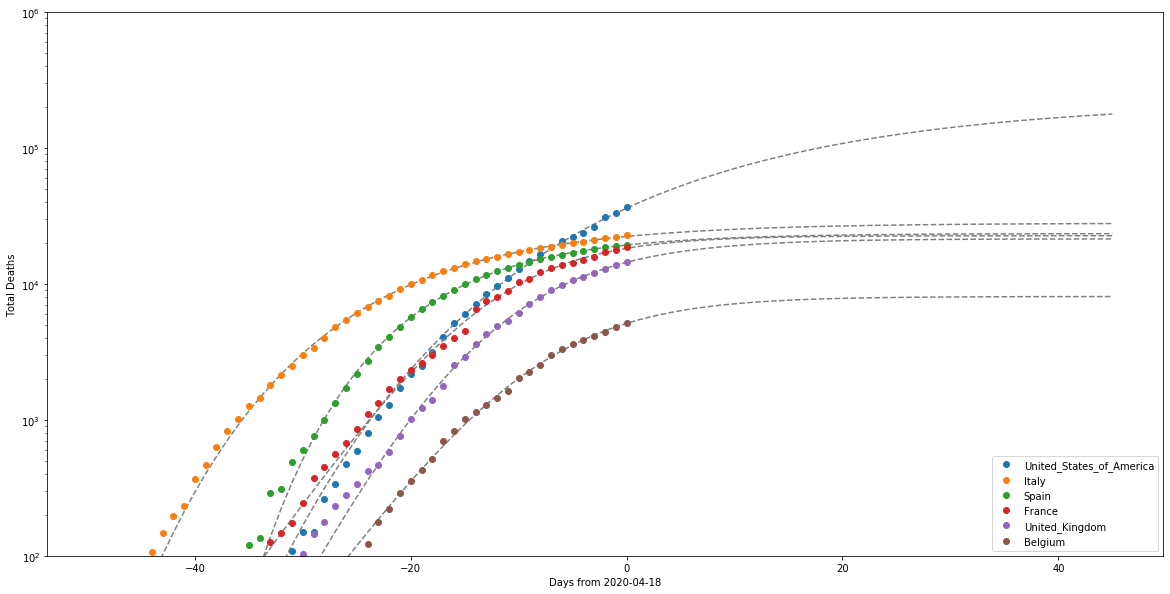

In [43]:
# log scale on the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:6]:
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, p0=[10000,10,.1,0,1], maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.ylim([100,1000000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=4)